# Análisis de Algoritmos de Palíndromos

En este notebook, analizaremos tres algoritmos diseñados para verificar si una cadena es un palíndromo. Un palíndromo es una cadena que se lee igual de izquierda a derecha que de derecha a izquierda, como "anilina" o "reconocer". Los algoritmos que estudiaremos son: 

1. **Reversed**: Compara la cadena con su versión invertida.
2. **Recursivo**: Verifica recursivamente si la cadena es un palíndromo.
3. **For Loop**: Usa un bucle para comparar los caracteres desde los extremos hacia el centro.

Además de explicar cómo funcionan estos algoritmos, ejecutaremos pruebas unitarias para verificar su correcto funcionamiento, mediremos la cobertura del código para asegurar que todas las partes del código han sido probadas, y finalmente analizaremos los resultados mediante gráficas que nos permitirán comparar su rendimiento en términos de tiempo de ejecución.

## 1. Explicación de los Algoritmos

### Algoritmo 1: Reversed
El primer algoritmo, Reversed, es quizás el más intuitivo. Su funcionamiento se basa en comparar la cadena original con su versión invertida. Si ambas cadenas son iguales, entonces la cadena es un palíndromo. 

#### Pseudocódigo
```python
def is_palindrome_reversed(s):
    s = s.lower()
    return s == s[::-1]
```
#### Complejidad

Temporal: $O(n)$, donde $n$ es la longitud de la cadena. Invertir la cadena toma $O(n)$.

#### Características

- Simple y fácil de implementar.

- Requiere memoria adicional para almacenar la cadena invertida.


### Algoritmo 2: Recursivo

El segundo algoritmo, Recursivo, utiliza un enfoque recursivo para verificar si una cadena es un palíndromo. La idea es comparar el primer y último carácter de la cadena. Si son iguales, se llama recursivamente a la función con la subcadena que excluye estos dos caracteres. Este proceso se repite hasta que la cadena se reduce a un solo carácter o a una cadena vacía, en cuyo caso se confirma que es un palíndromo. Si en algún momento los caracteres comparados no coinciden, la cadena no es un palíndromo.

#### Pseudocódigo
```python
def is_palindrome_recursive(s):
    s = s.lower()
    if len(s) <= 1:
        return True
    if s[0] != s[-1]:
        return False
    return is_palindrome_recursive(s[1:-1])
```

#### Complejidad

Temporal: $O(n)$, donde $n$ es la longitud de la cadena. Cada llamada recursiva procesa 2 caracteres.

#### Características

- Elegante y fácil de entender.

- Limitación: Una limitación importante de este algoritmo es que, en Python, el límite de recursión estándar es de alrededor de 1000 llamadas. Esto significa que, para cadenas de más de 1000 caracteres, se produce un error de desbordamiento de la pila de recursión. En el análisis, se eligió un límite conservador de 750 caracteres para evitar problemas, ya que el límite exacto puede variar dependiendo del entorno de ejecución y de la memoria disponible. Este valor fue seleccionado para garantizar que el algoritmo funcione correctamente en la mayoría de los casos sin llegar al límite de recursión.

### Algoritmo 3: For Loop

El tercer algoritmo, For Loop, utiliza un bucle para comparar los caracteres de la cadena desde los extremos hacia el centro. Comparamos el primer carácter con el último, el segundo con el penúltimo, y así sucesivamente. Si en algún momento los caracteres comparados no coinciden, la cadena no es un palíndromo. Si el bucle termina sin encontrar discrepancias, la cadena es un palíndromo.

#### Pseudocódigo

```python
def is_palindrome_for_loop(s):
    s = s.lower()
    length = len(s)
    for i in range(length // 2):
        if s[i] != s[length - i - 1]:
            return False
    return True
```

#### Complejidad

Temporal: $O(n)$, donde $n$ es la longitud de la cadena. El bucle se ejecuta $n/2$ veces.

#### Características

- Eficiente en memoria.

- No tiene limitaciones de recursión.

## 2. Pruebas Unitarias y Cobertura

Para asegurarnos de que los algoritmos funcionan correctamente, implementamos un conjunto de pruebas unitarias. Estas pruebas verifican que los algoritmos devuelven el resultado esperado para diferentes casos, incluyendo cadenas palindrómicas, no palindrómicas, cadenas vacías y cadenas con caracteres especiales. Las pruebas unitarias se ejecutan utilizando el módulo unittest de Python.

In [13]:
!python -m unittest test_palindrome.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


Además de las pruebas unitarias, medimos la cobertura del código utilizando la herramienta coverage. La cobertura del código nos indica qué porcentaje del código ha sido ejecutado durante las pruebas, lo que nos ayuda a identificar partes del código que no han sido probadas. Para medir la cobertura, ejecutamos las pruebas unitarias con el comando coverage run y luego generamos un informe con coverage report. Este informe nos muestra las líneas de código que no han sido cubiertas por las pruebas, lo que nos permite mejorar la calidad de nuestro código.

In [14]:
!coverage run -m unittest test_palindrome.py
!coverage report -m

...
----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK
Name                       Stmts   Miss  Cover   Missing
--------------------------------------------------------
palindrome_algorithms.py      22      1    95%   19
test_palindrome.py            17      1    94%   23
--------------------------------------------------------
TOTAL                         39      2    95%


## 3. Análisis y Gráficas

### Metodología de Análisis

Para comparar el rendimiento de los algoritmos, generamos cadenas palindrómicas de diferentes longitudes, desde 10 hasta 100,000 caracteres. Para cada longitud, medimos el tiempo de ejecución de los tres algoritmos. Para obtener resultados más confiables, ejecutamos cada algoritmo múltiples veces y calculamos la mediana del tiempo de ejecución. Esto nos permite reducir el impacto de fluctuaciones aleatorias en los tiempos de ejecución.

### Generación de Datos

Las cadenas palindrómicas se generaron utilizando una función que crea una cadena aleatoria y luego la convierte en un palíndromo. Para cada longitud de cadena, ejecutamos los algoritmos y registramos los tiempos de ejecución. Estos datos se almacenaron en un archivo CSV para su posterior análisis.

### Gráficas Generadas

A continuación, se presentan las gráficas generadas a partir de los datos recopilados:

1. Comparación de los tres algoritmos (hasta 750 caracteres):

Esta gráfica muestra el tiempo de ejecución de los tres algoritmos para cadenas de hasta 750 caracteres. Se eligió este límite para garantizar que el algoritmo recursivo funcione correctamente sin alcanzar el límite de recursión de Python. Aquí podemos observar que el algoritmo Reversed y el For Loop son los más eficientes, seguido por el For Loop y finalmente el Recursivo.

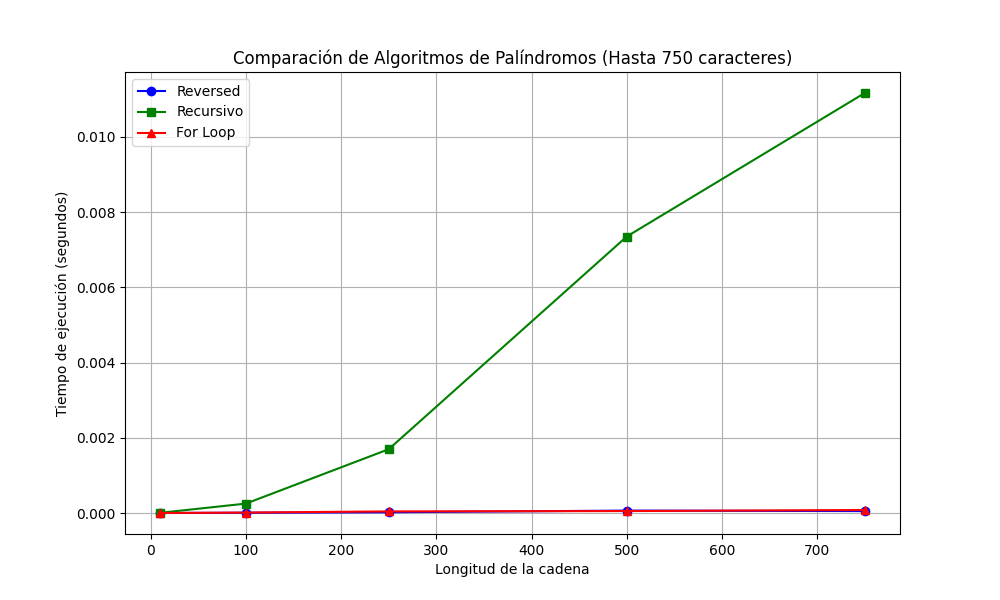

In [15]:
from IPython.display import Image

# Cargar una imagen desde un archivo local
Image(filename="tiempo_vs_longitud_hasta_750.png")

2. Comparación de Reversed y For Loop (todas las longitudes):

En esta gráfica, comparamos los algoritmos Reversed y For Loop para todas las longitudes de cadena, incluyendo las más grandes. El algoritmo Reversed es el más eficiente en todos los casos.

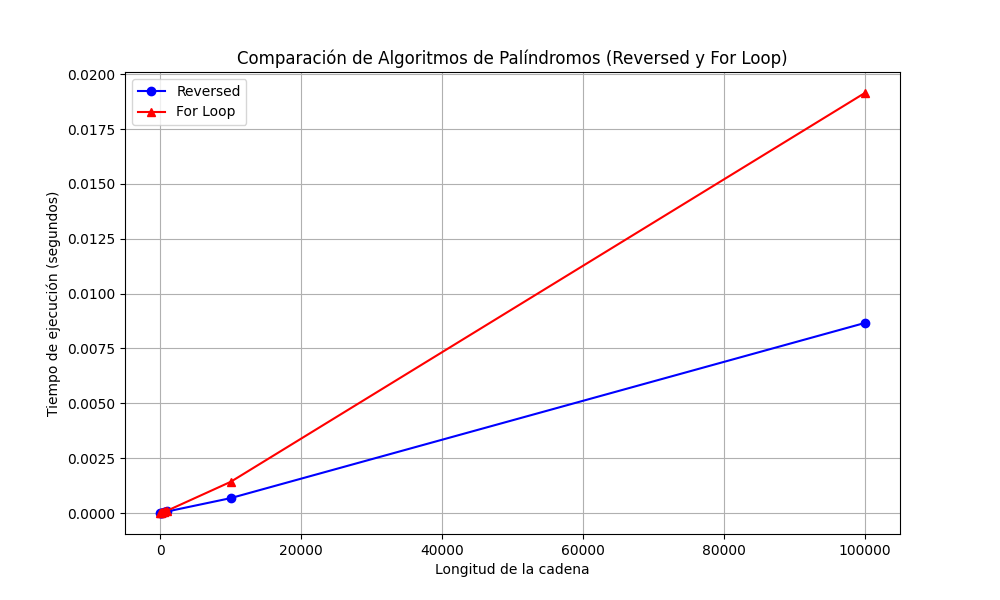

In [16]:
# Cargar una imagen desde un archivo local
Image(filename="tiempo_vs_longitud_reversed_for_loop.png")

3. Tiempo de ejecución normalizado (hasta 750 caracteres):
Esta gráfica muestra el tiempo de ejecución dividido por la longitud de la cadena para los tres algoritmos. El algoritmo Reversed y el For Loop tienen un comportamiento similar, teniendo un tiempo bajo de ejecución normalizado, lo que indica que son los más eficientes en términos de tiempo por carácter.

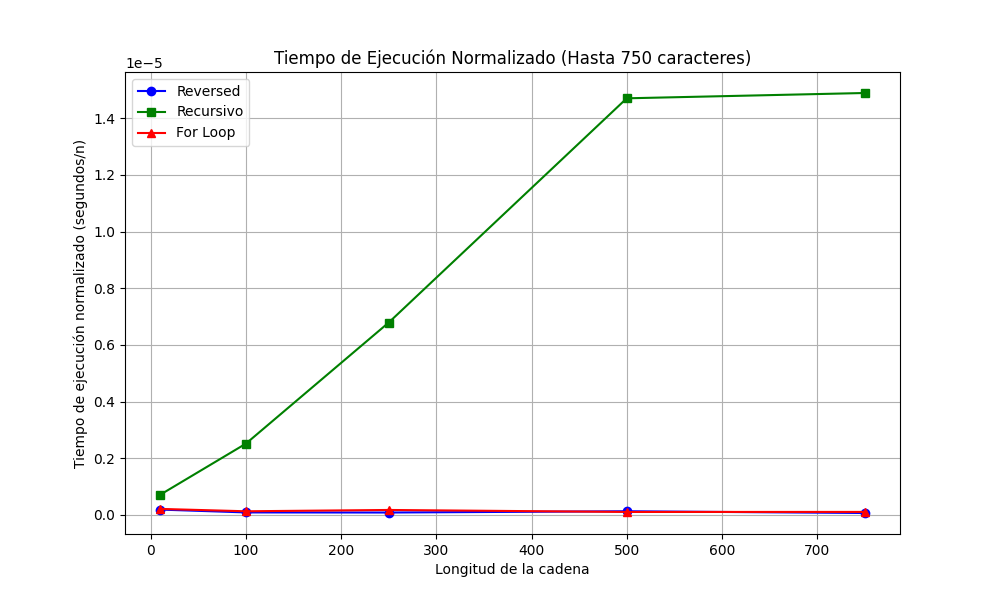

In [17]:
# Cargar una imagen desde un archivo local
Image(filename="tiempo_normalizado_hasta_750.png")

4. Tiempo de ejecución normalizado (Reversed y For Loop, todas las longitudes):
Similar a la gráfica anterior, pero enfocada en los algoritmos Reversed y For Loop para todas las longitudes de cadena. El algoritmo Reversed mantiene su ventaja en eficiencia.

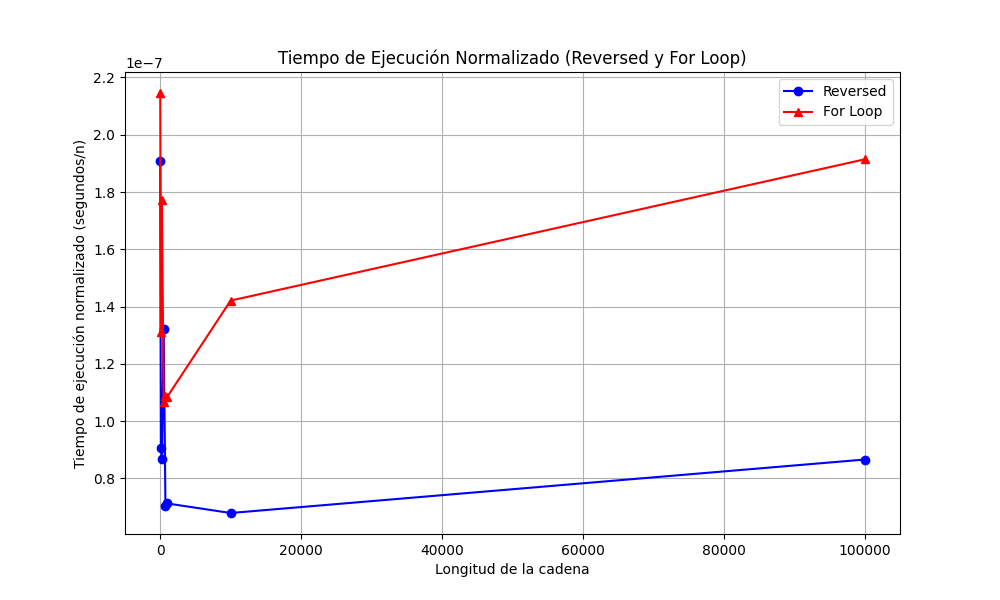

In [18]:
# Cargar una imagen desde un archivo local
Image(filename="tiempo_normalizado_reversed_for_loop.png")

5. Tiempo de ejecución en escala logarítmica (Reversed y For Loop):
Esta gráfica utiliza una escala logarítmica para visualizar las diferencias en los tiempos de ejecución cuando estos varían en órdenes de magnitud. El algoritmo Reversed es claramente el más eficiente, incluso en cadenas muy grandes.

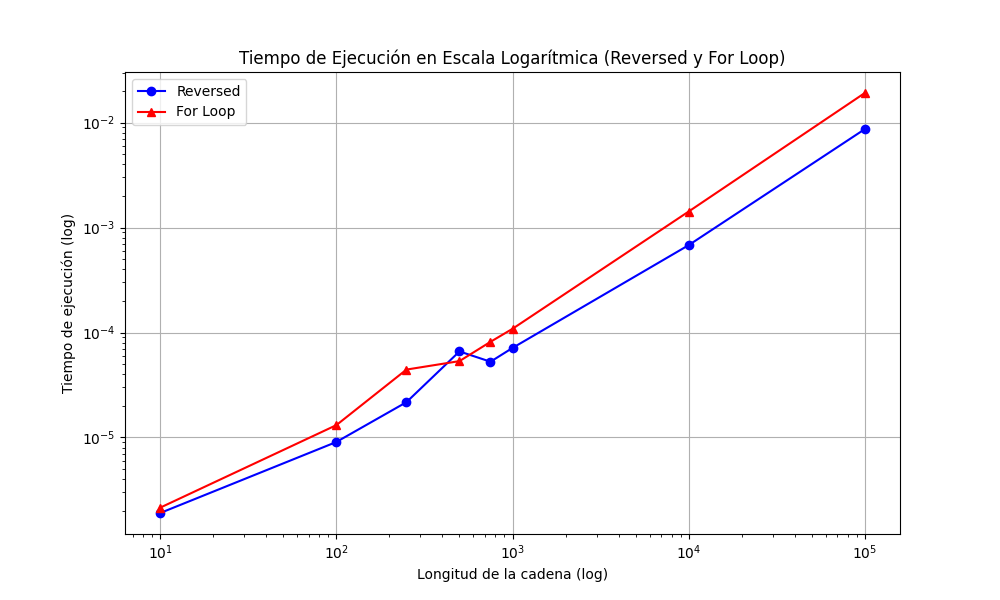

In [19]:
# Cargar una imagen desde un archivo local
Image(filename="tiempo_logaritmico_reversed_for_loop.png")

6. Tiempo de ejecución acumulado (Reversed y For Loop):
Esta gráfica muestra el tiempo de ejecución acumulado para los algoritmos Reversed y For Loop. El algoritmo Reversed tiene el menor tiempo acumulado, lo que confirma su superioridad en términos de eficiencia.

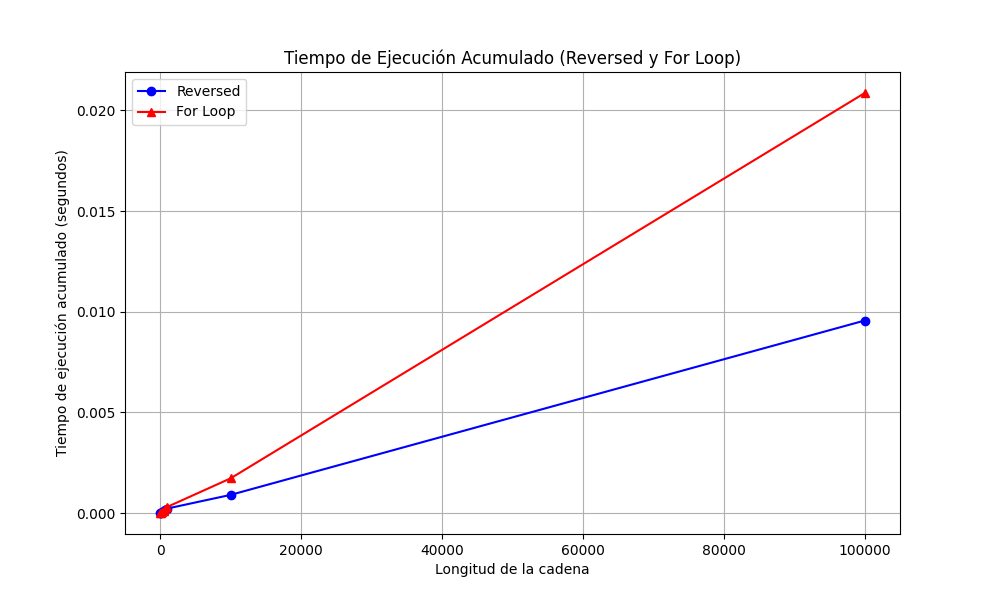

In [20]:
# Cargar una imagen desde un archivo local
Image(filename="tiempo_acumulado_reversed_for_loop.png")

## Conclusiones

Tras analizar los resultados de las pruebas y las gráficas generadas, podemos llegar a varias conclusiones importantes sobre el rendimiento de los algoritmos Reversed, For Loop y Recursivo para verificar palíndromos.

En primer lugar, el algoritmo Reversed demostró ser el más eficiente en términos de tiempo de ejecución en todas las longitudes de cadena evaluadas. Este algoritmo compara la cadena original con su versión invertida, lo que, aunque requiere memoria adicional para almacenar la cadena invertida, resulta en un tiempo de ejecución muy bajo. En las gráficas, se observa claramente que el Reversed tiene el menor tiempo de ejecución, incluso en cadenas grandes. Su simplicidad y velocidad lo convierten en la mejor opción para la mayoría de los casos prácticos, especialmente cuando el rendimiento es una prioridad.

Por otro lado, el algoritmo For Loop también mostró un buen rendimiento, aunque ligeramente inferior al del Reversed. Este algoritmo utiliza un bucle para comparar los caracteres desde los extremos hacia el centro de la cadena, lo que lo hace eficiente en términos de memoria, ya que no requiere almacenar una copia adicional de la cadena. Sin embargo, su tiempo de ejecución es un poco mayor que el del Reversed, especialmente en cadenas grandes. A pesar de esto, el For Loop es una excelente alternativa cuando la memoria es un recurso limitado o cuando se prefieren soluciones iterativas sobre recursivas.

En cuanto al algoritmo Recursivo, los resultados muestran que es mucho más lento que los otros dos algoritmos. Aunque es elegante y fácil de entender, su enfoque recursivo implica un alto costo en tiempo de ejecución. En las gráficas que incluyen el algoritmo recursivo (hasta 750 caracteres), se observa que su tiempo de ejecución es significativamente mayor que el de los otros dos algoritmos. Además, este algoritmo tiene una limitación importante: el límite de recursión en Python, que es de alrededor de 1000 llamadas. Para evitar problemas, elegimos un límite conservador de 750 caracteres, lo que garantiza que el algoritmo funcione correctamente en la mayoría de los casos. Sin embargo, esta limitación lo hace inviable para cadenas grandes, y su rendimiento lo convierte en una opción poco práctica para aplicaciones que requieren eficiencia.

En resumen, el algoritmo Reversed es la mejor opción en términos de rendimiento, siendo ideal para la mayoría de los casos prácticos. El algoritmo For Loop es una buena alternativa cuando la memoria es un factor crítico, aunque su rendimiento es ligeramente inferior. Por último, el algoritmo Recursivo, aunque útil para fines educativos o para cadenas muy pequeñas, es mucho más lento y tiene limitaciones importantes que lo hacen poco recomendable para cadenas grandes o aplicaciones que requieren alto rendimiento.

### Nota sobre el Límite de 750 Caracteres

El límite de 750 caracteres para el algoritmo recursivo fue elegido de manera conservadora para evitar problemas con el límite de recursión en Python, que es de alrededor de 1000 llamadas. Este valor no está basado en un análisis exhaustivo, sino en la necesidad de garantizar que el algoritmo funcione correctamente en la mayoría de los casos. Si se desea utilizar el algoritmo recursivo para cadenas más grandes, se puede aumentar el límite de recursión en Python utilizando ```sys.setrecursionlimit()```, aunque esto puede causar problemas de rendimiento o desbordamiento de la pila en entornos con memoria limitada.
